<a href="https://colab.research.google.com/github/SriSharanya-617/ensemblelearning/blob/main/stackingensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Social_Network_Ads.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Mounted at /content/drive
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
x=df.iloc[:,2:3].values #age,estimated salry
y=df.iloc[:,4].values #purchased

In [5]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [6]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#standardistion
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


define base models

In [7]:
base_models=[
    ('lr',  LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

define meta model
meta model decides how to combine models

In [8]:
meta_model=LogisticRegression()


Build Stacking Classifier

In [9]:
classifier=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)
classifier.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [10]:
y_pred=classifier.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.9125


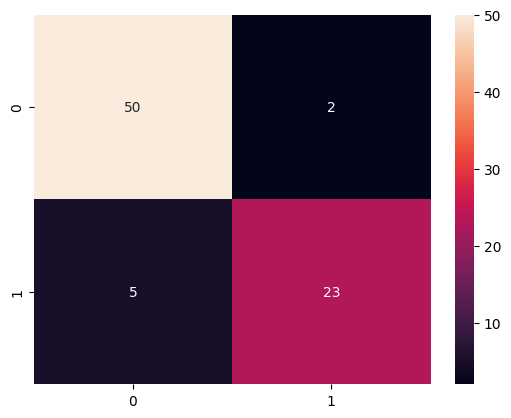

[[50  2]
 [ 5 23]]


In [11]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()
print(cm)

In [12]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/train_u6lujuX_CVtuZ9i.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Ar

In [13]:
# Target variable
y = df['Loan_Status']

# Feature variables (drop target and ID)
x = df.drop(columns=['Loan_Status', 'Loan_ID'])

print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (614, 11)
y shape: (614,)


In [14]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [15]:
# Categorical columns
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Credit_History (binary but treated as categorical)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-17694637.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-17694637.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Handle missing values in Dependents and convert to numeric
# This needs to be done on the full 'x' DataFrame before splitting
x['Dependents'].fillna(x['Dependents'].mode()[0], inplace=True)
x['Dependents'] = x['Dependents'].replace('3+', '3').astype(int)

# Identify categorical columns (excluding Dependents which is now numeric)
categorical_cols_X = x.select_dtypes(include='object').columns

# One-hot encode categorical features
x = pd.get_dummies(x, columns=categorical_cols_X, drop_first=True)

# Apply SimpleImputer for any remaining numerical missing values after one-hot encoding
# (e.g., if any numerical columns had NaNs)
imputer = SimpleImputer(strategy='median')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/tmp/ipython-input-58220310.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Dependents'].fillna(x['Dependents'].mode()[0], inplace=True)


In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)


In [46]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7))
]

meta_model = LogisticRegression()


In [47]:
stack_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stack_clf.fit(x_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=7))],
                   final_estimator=LogisticRegression())

In [49]:
y_pred=stack_clf.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.8455284552845529


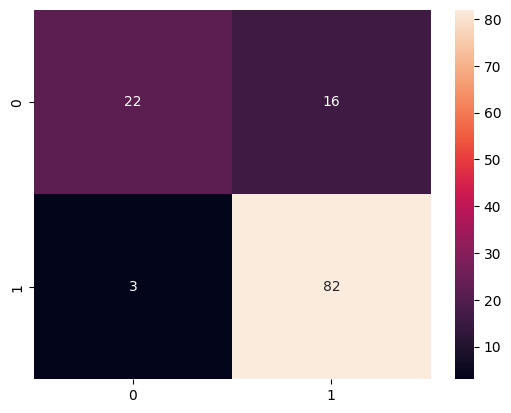

[[22 16]
 [ 3 82]]


In [50]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()
print(cm)

In [51]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/kc_house_data.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4 

In [52]:
# Target variable
y = df['price']

# Feature variables
x = df.drop(columns=['price', 'id', 'date'])

print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (21613, 18)
y shape: (21613,)


In [53]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [54]:
# Train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

base_models=[
    ('lr',  LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=3)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

In [56]:
from sklearn.tree import DecisionTreeRegressor

meta_model=DecisionTreeRegressor()

In [64]:
from sklearn.ensemble import StackingRegressor

regressor=StackingRegressor(estimators=base_models,final_estimator=meta_model,cv=5)
regressor.fit(x_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor(max_depth=3)),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=DecisionTreeRegressor())

In [59]:
from sklearn.metrics import r2_score, mean_squared_error


In [65]:
y_pred = regressor.predict(x_test)

In [66]:
y_pred = regressor.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.6208857019095726
MSE: 57313253154.87671
